# Scraping du site de la SNEP : Top Albums hebdomadaire

Import de BeautifulSoup, requests, pandas, numpy et la classe Album

In [40]:
from bs4 import BeautifulSoup
from album import Album
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import argparse
import requests
import datetime
import time

Récupération des données du site (top albums) et initialisation de BeautifulSoup

In [2]:
request_text = requests.get('https://snepmusique.com/les-tops/le-top-de-la-semaine/top-albums/')
soup = BeautifulSoup(request_text.content, 'html.parser')

Création d'un DataFrame avec les colonnes relatives à un album

In [3]:
df = pd.DataFrame(columns=['rank','trend','title','artist','editor','last_week_rank','week_in','best_rank','certification','certification_date'])

Bouclage sur la liste d'album du site, création des objets Album et du contenu du DataFrame

In [4]:
top_albums = []
limit = 30

for element in soup.find_all('div', class_='item', limit=limit):
    
    rank = element.find('div', class_='rang')
    trend_up = element.find('div', class_='rang_up icon-bigarrowup')
    trend_down = element.find('div', class_='rang_down icon-bigarrowdown')
    title = element.find('div', class_='titre')
    artist = element.find('div', class_='artiste')
    editor = element.find('div', class_='editeur')
    last_week_rank = element.find('div', class_='rang_precedent')
    week_in = element.find('div', class_='week_in')
    best_rank = element.find('div', class_='best_pos')

    top_albums.append(Album(
        rank.get_text(),
        'Up' if(trend_up != None) else ('Down' if(trend_down != None) else 'Neutral'),
        title.get_text(),
        artist.get_text(),
        editor.get_text(),
        0 if last_week_rank == None else int(last_week_rank.find('strong').get_text()[0:-2 if 'er' in last_week_rank.find('strong').get_text() else -1]),
        0 if week_in.find('strong').get_text() == 'Nouvelle entrée' else int(week_in.find('strong').get_text()[0:-2 if 'er' in week_in.find('strong').get_text() else -1]),
        int(best_rank.find('strong').get_text()[0:-2 if 'er' in best_rank.find('strong').get_text() else -1]),
        None,
        None
    ))

Récupération des certifications

In [5]:
for album in top_albums:
    print('', end='\r')
    print(f'[.  ] Scraping certification (album {album.rank}/{limit}).', end='\r')
    time.sleep(1)
    print(f'[.. ] Scraping certification (album {album.rank}/{limit}).', end='\r')
    time.sleep(1)
    print(f'[...] Scraping certification (album {album.rank}/{limit}).', end='\r')
    time.sleep(1)
    
    request_text = requests.get(f'https://snepmusique.com/les-certifications/?categorie=Albums&interprete={album.artist}&titre={album.title}')
    soup = BeautifulSoup(request_text.content, 'html.parser')

    album.certification = soup.find('div', class_='certif').get_text() if soup.find('div', class_='certification') else ''
    album.certification_date = soup.find_all('div', class_='date')[1].get_text()[15:] if soup.find('div', class_='certification') else ''

    df = df.append({
        'rank': album.rank,
        'trend': album.trend,
        'title': album.title,
        'artist': album.artist,
        'editor': album.editor,
        'last_week_rank': album.last_week_rank,
        'week_in': album.week_in,
        'best_rank': album.best_rank,
        'certification': album.certification,
        'certification_date': album.certification_date
    }, ignore_index=True)
    
print()
print("Done.")

Scraping certification (album 30/30)...
Done.


Apperçu du dataFrame

In [6]:
df['rank'] = df['rank'].astype('int')
df['trend'] = df['trend'].astype('string')
df['title'] = df['title'].astype('string')
df['artist'] = df['artist'].astype('string')
df['editor'] = df['editor'].astype('string')
df['last_week_rank'] = df['last_week_rank'].astype('int')
df['week_in'] = df['week_in'].astype('int')
df['best_rank'] = df['best_rank'].astype('int')
df['certification'] = df['certification'].astype('string')

df.dtypes

rank                   int64
trend                 string
title                 string
artist                string
editor                string
last_week_rank         int64
week_in                int64
best_rank              int64
certification         string
certification_date    object
dtype: object

In [7]:
df

,rank,trend,title,artist,editor,last_week_rank,week_in,best_rank,certification,certification_date
0,1,Neutral,JEFE,NINHO,REC. 118 / MAL LUNE MUSIC,0,0,1,Or,09/12/2021
1,2,Down,CIVILISATION,ORELSAN,3EME BUREAU,1,2,1,Double Platine,09/12/2021
2,3,Down,30,ADELE,COLUMBIA,2,2,2,Platine,09/12/2021
3,4,Neutral,NONANTE-CINQ,ANGÈLE,ROMANCE MUSIQUE / ANGELE VL RECORDS,0,0,4,,
4,5,Down,=,ED SHEERAN,WEA / EAST WEST UK,4,5,1,Or,18/11/2021
5,6,Up,MESDAMES,GRAND CORPS MALADE,CAROLINE FRANCE / ANOUCHE PRODUCTIONS,10,63,1,Triple Platine,27/05/2021
6,7,Up,CHASSEUR D'ETOILES,SOPRANO,REC118 / REC. 118,8,12,1,Platine,25/11/2021
7,8,Up,SOUS UN SOLEIL ÉNORME,BERNARD LAVILLIERS,ROMANCE MUSIQUE,9,3,3,,
8,9,Down,COUNTRY ROCK,EDDY MITCHELL,POLYDOR,6,2,3,,
9,10,Down,VOYAGE,ABBA,POLYDOR / UNIVERSAL MUSIC,7,4,1,Or,18/11/2021


Analyse de la répartition des certifications

In [16]:
no_certification = df.certification.where(df.certification == '').count()
gold = df.certification.where(df.certification == 'Or').count()
platinium = df.certification.where(df.certification == 'Platine').count()
double_platinium = df.certification.where(df.certification == 'Double Platine').count()
triple_platinium = df.certification.where(df.certification == 'Triple Platine').count()
diamond = df.certification.where(df.certification == 'Diamant').count()
double_diamond = df.certification.where(df.certification == 'Double Diamant').count()
triple_diamond = df.certification.where(df.certification == 'Triple Diamant').count()
quad_diamond = df.certification.where(df.certification == 'Quadruple Diamant').count()

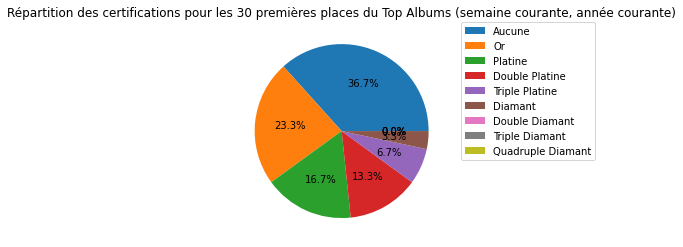

In [58]:
array = np.array([no_certification, gold, platinium, double_platinium, triple_platinium, diamond, double_diamond, triple_diamond, quad_diamond])
labels = ["Aucune", "Or", "Platine", "Double Platine", "Triple Platine", "Diamant", "Double Diamant", "Triple Diamant", "Quadruple Diamant"]

plt.pie(array, autopct='%1.1f%%')
plt.title(f"Répartition des certifications pour les {limit} premières places du Top Albums (semaine courante, année courante)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, labels = labels)
plt.savefig(f"results/certifications_{datetime.datetime.now().isoformat()}.jpg", bbox_inches="tight")
plt.show()